In [1]:
pip show classiq

Name: classiq
Version: 0.42.2
Summary: Classiq's Python SDK for quantum computing
Home-page: https://classiq.io
Author: Classiq Technologies
Author-email: support@classiq.io
License: Proprietary
Location: D:\anaconda_new\envs\womanium\Lib\site-packages
Requires: black, ConfigArgParse, httpx, keyring, matplotlib, networkx, numexpr, numpy, packaging, pandas, plotly, pydantic, Pyomo, scipy, sympy, tabulate
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U classiq

  Using cached classiq-0.43.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached packaging-22.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached pydantic-1.10.17-cp311-cp311-win_amd64.whl.metadata (153 kB)
Using cached classiq-0.43.0-py3-none-any.whl (387 kB)
Using cached packaging-22.0-py3-none-any.whl (42 kB)
Using cached pydantic-1.10.17-cp311-cp311-win_amd64.whl (2.1 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:
      Successfully uninstalled pydantic-2.8.2
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
  Attempting uninstall: classiq
    Found existing installation: classiq 0.42.2
    Uninstalling classiq-0.42.2:
      Successfully uninstalled classiq-0.42.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dwave-cloud-client 0.12.0 requires pydantic<3,>=2, but you have pydantic 1.10.17 which is incompatible.
pyquil 4.12.0 requires packaging<24.0,>=23.1, but you have packaging 22.0 which is incompatible.


Expectation values: [-1.0, -1.0, -1.0, -1.0, -1.0]


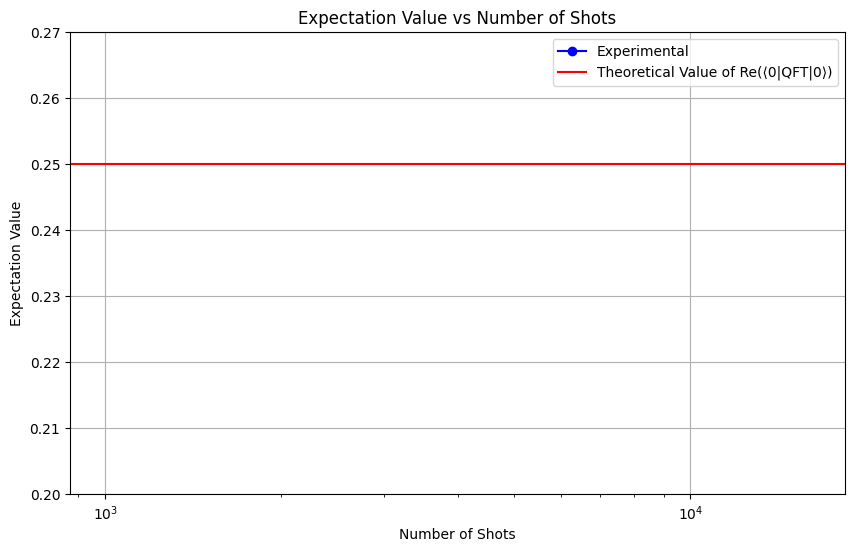

done


In [8]:
# Import necessary libraries
from classiq import *
from classiq.execution import ExecutionPreferences
import matplotlib.pyplot as plt

# Define the quantum function
@qfunc
def main(expectation_value: Output[QBit]):
    allocate(1, expectation_value)
    psi = QArray[QBit](name="psi")
    allocate(4, psi)
    hadamard_transform(expectation_value)
    control(ctrl=expectation_value, operand=lambda: qft(psi))
    hadamard_transform(expectation_value)

# Function to execute the quantum program with a given number of shots
def execute_quantum_program(num_shots):
    quantum_model = create_model(main)
    quantum_model_with_execution_preferences = set_execution_preferences(
        quantum_model,
        ExecutionPreferences(
            num_shots=num_shots, job_name=str(num_shots) + " - execution", random_seed=767
        ),
    )
    quantum_program_with_execution_preferences = synthesize(
        quantum_model_with_execution_preferences
    )
    job = execute(quantum_program_with_execution_preferences)
    results = job.result()[0].value
    return results.parsed_states

# Execute the quantum program with different number of shots
shots = [1000, 2000, 4000, 8000, 16000]
results = [execute_quantum_program(shot) for shot in shots]

# Calculate the expectation values
expectation_values = []
for result in results:
    count_0 = result['0']['expectation_value']
    count_1 = result['1']['expectation_value']
    total_count = count_0 + count_1
    if total_count == 0:
        expectation_value = 0  # Avoid division by zero
    else:
        expectation_value = (2 * count_0 / total_count) - 1
    expectation_values.append(expectation_value)

# Print expectation values for verification
print("Expectation values:", expectation_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(shots, expectation_values, marker='o', linestyle='-', color='b', label='Experimental')
plt.axhline(y=0.25, color='r', linestyle='-', label='Theoretical Value of Re(⟨0|QFT|0⟩)')
plt.xlabel('Number of Shots')
plt.ylabel('Expectation Value')
plt.title('Expectation Value vs Number of Shots')
plt.legend()
plt.grid(True)
plt.ylim(0.2, 0.27)  # Set y-axis limits
plt.xscale('log')  # Use logarithmic scale for x-axis
plt.show()

print('done')